# Dataset F profiling
Dataset columns are printed with their standardized distribution. Pandas-profiling (https://github.com/pandas-profiling/pandas-profiling) is used to display relevant metrics.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import src.core_stateless as statelessApi
from src.core import valueDistribution
from src.core_configs import getConfigF

Using TensorFlow backend.


In [2]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = getConfigF("30min")

relevantColumns, columnDescriptions, columnUnits, columnNames, df = statelessApi.initDataframe(
    filename,
    columns,
    irrelevantColumns,
)

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

# Value Distribution
On the left, plots of the standardized sample points for each column can be seen. On the right, a distribution of the standardized values is shown. Training points are plotted in dark blue, while testing points are light blue.

Notice that the gas rate is increasing throughout the majority of the training and testing period, indicating that the field is still under development and has yet to reach its maximum design capacity. As a result, the distributions of the gas rate is somewhat unbalanced between the training and testing set. For the remaining values, the distributions are more similar.

Finding data between 2018-01-01 00:00:00 and 2018-08-01 00:00:00
Found 8222 rows

Finding data between 2018-01-01 00:00:00 and 2019-05-01 00:00:00
Found 19349 rows



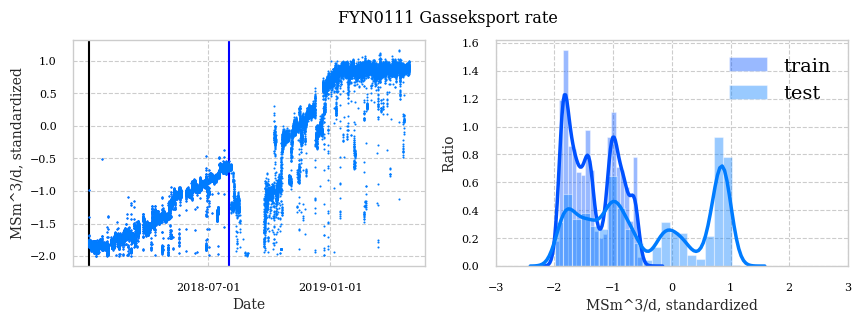

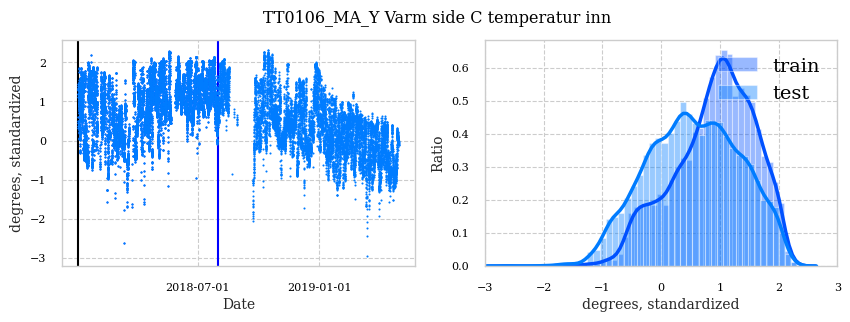

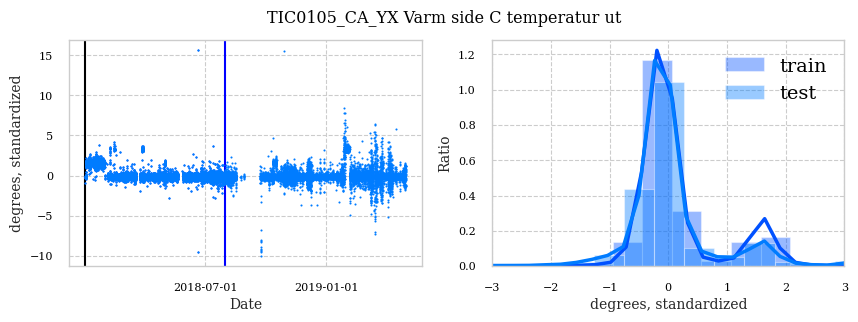

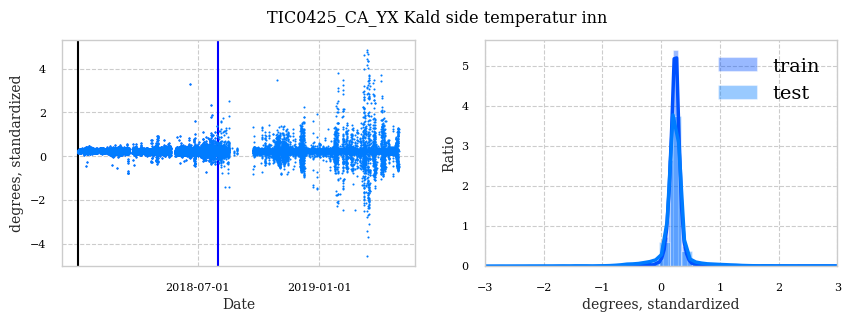

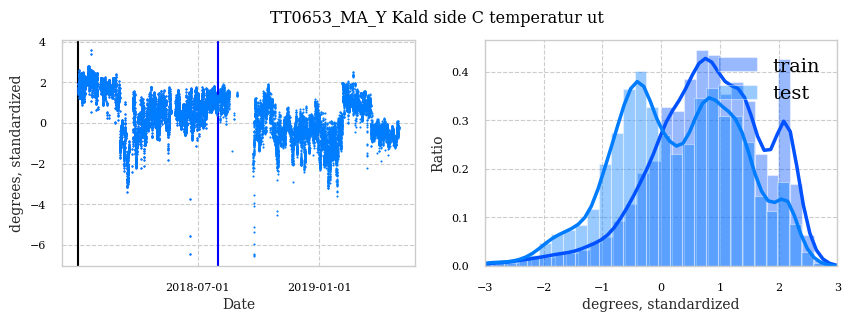

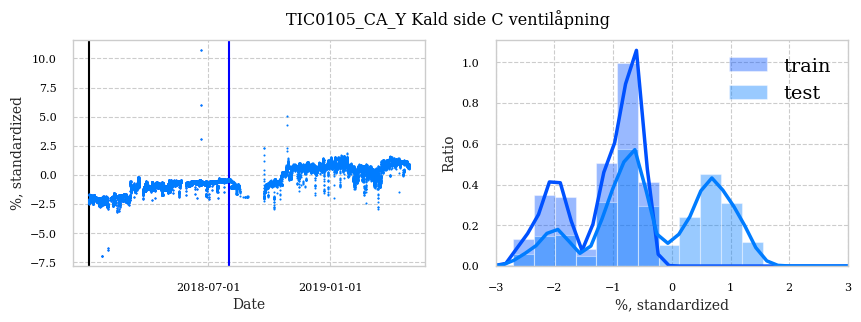

In [3]:
valueDistribution(df, traintime, testtime, columnDescriptions, columnUnits)

# Profiling
Pandas profiling offers detailed information about the provided dataset. Metrics such as missing cells, memory size, column uniqueness and column correlation can be seen.

In [4]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report.to_file(output_file="profiling/dataset_profiling_F.html")
report